# Project Title : Loan Disbursal Risk

In [1]:
#importing the required libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.feature_selection import RFE
from imblearn.ensemble import BalancedBaggingClassifier
from sklearn.metrics import classification_report , confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN
from imblearn.over_sampling import SMOTE
from imblearn.ensemble import BalancedBaggingClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import MinMaxScaler

In [3]:
# reading the dataset

df=pd.read_csv("Training Data.csv",index_col=0)
df.head()

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
Id,,,,,,,,,,,,
1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1


In [4]:
# shape of dataset

df.shape

(252000, 12)

In [5]:
# information about dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 252000 entries, 1 to 252000
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Income             252000 non-null  int64 
 1   Age                252000 non-null  int64 
 2   Experience         252000 non-null  int64 
 3   Married/Single     252000 non-null  object
 4   House_Ownership    252000 non-null  object
 5   Car_Ownership      252000 non-null  object
 6   Profession         252000 non-null  object
 7   CITY               252000 non-null  object
 8   STATE              252000 non-null  object
 9   CURRENT_JOB_YRS    252000 non-null  int64 
 10  CURRENT_HOUSE_YRS  252000 non-null  int64 
 11  Risk_Flag          252000 non-null  int64 
dtypes: int64(6), object(6)
memory usage: 25.0+ MB


In [6]:
# check for null values in dataset

df.isnull().sum()

Income               0
Age                  0
Experience           0
Married/Single       0
House_Ownership      0
Car_Ownership        0
Profession           0
CITY                 0
STATE                0
CURRENT_JOB_YRS      0
CURRENT_HOUSE_YRS    0
Risk_Flag            0
dtype: int64

# EDA - Exploratory Data Analysis

<AxesSubplot:xlabel='Income'>

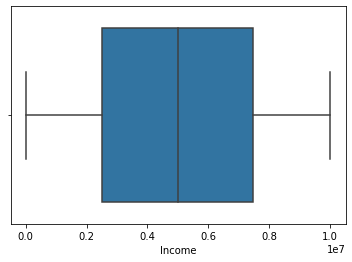

In [7]:
# check for outliers

sns.boxplot(df['Income'])

<AxesSubplot:xlabel='Age'>

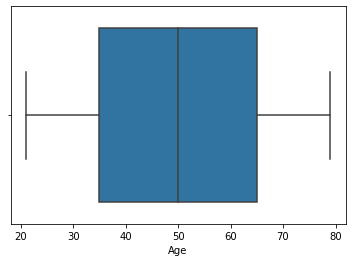

In [8]:
# check for outliers

sns.boxplot(df['Age'])

In [9]:
# The mean age is 50Years.

<AxesSubplot:xlabel='Experience'>

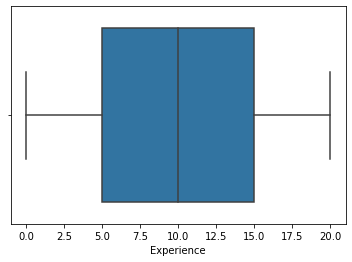

In [10]:
# check for outliers

sns.boxplot(df['Experience'])

In [11]:
# The mean experience is 10 yrs. 

<AxesSubplot:xlabel='CURRENT_JOB_YRS'>

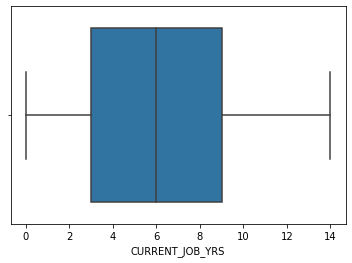

In [12]:
# check for outliers

sns.boxplot(df['CURRENT_JOB_YRS'])

In [13]:
# The mean of current_job_yrs is 6.

<AxesSubplot:xlabel='CURRENT_HOUSE_YRS'>

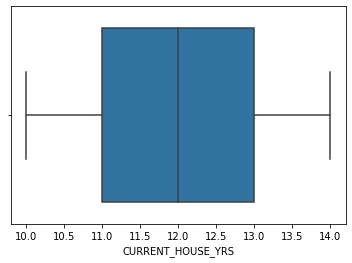

In [14]:
# check for outliers

sns.boxplot(df['CURRENT_HOUSE_YRS'])

In [15]:
# the mean of current house yrs is 12

# There are no Outliers in the dataset.

In [16]:
df.columns

Index(['Income', 'Age', 'Experience', 'Married/Single', 'House_Ownership',
       'Car_Ownership', 'Profession', 'CITY', 'STATE', 'CURRENT_JOB_YRS',
       'CURRENT_HOUSE_YRS', 'Risk_Flag'],
      dtype='object')

<AxesSubplot:xlabel='Income', ylabel='Density'>

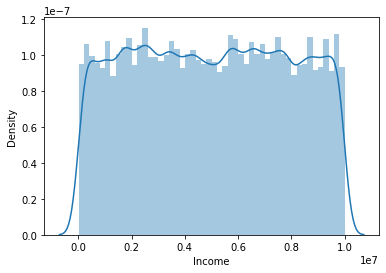

In [17]:
sns.distplot(df['Income'])

In [18]:
# there is no skewness and this is platyukurtic distribution

<AxesSubplot:xlabel='Age', ylabel='Density'>

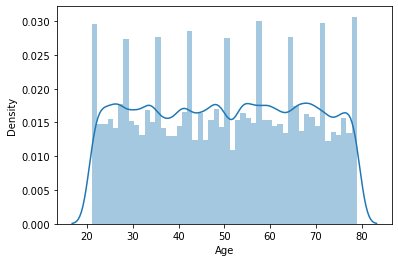

In [19]:
sns.distplot(df['Age'])

In [20]:
# there is no skewness and this is platyukurtic distribution

<AxesSubplot:xlabel='Experience', ylabel='Density'>

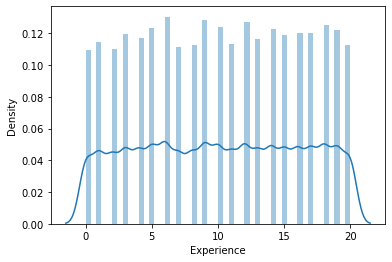

In [21]:
sns.distplot(df['Experience'])

In [22]:
# there is no skewness and this is platyukurtic distribution

<AxesSubplot:xlabel='Car_Ownership', ylabel='count'>

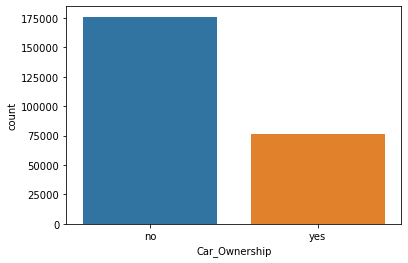

In [23]:
# Countplot of variable 'Car_Ownership'

sns.countplot(df['Car_Ownership'])

In [24]:
# Most of the people don’t have car and only 30.16% of people own a car.

<AxesSubplot:xlabel='Married/Single', ylabel='count'>

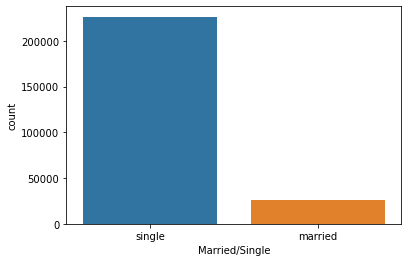

In [25]:
# Countplot of variable 'Married/Single

sns.countplot(df['Married/Single'])

In [26]:
percentage_count=df['Married/Single'].value_counts()/len(df)*100
percentage_count

single     89.790476
married    10.209524
Name: Married/Single, dtype: float64

In [27]:
# Most of the people are single and 10.21% of people are married.

<AxesSubplot:xlabel='House_Ownership', ylabel='count'>

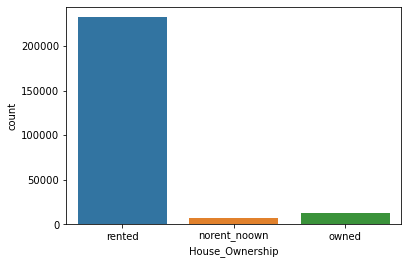

In [28]:
# Count plot of variable 'House_Ownership'

sns.countplot(df['House_Ownership'])

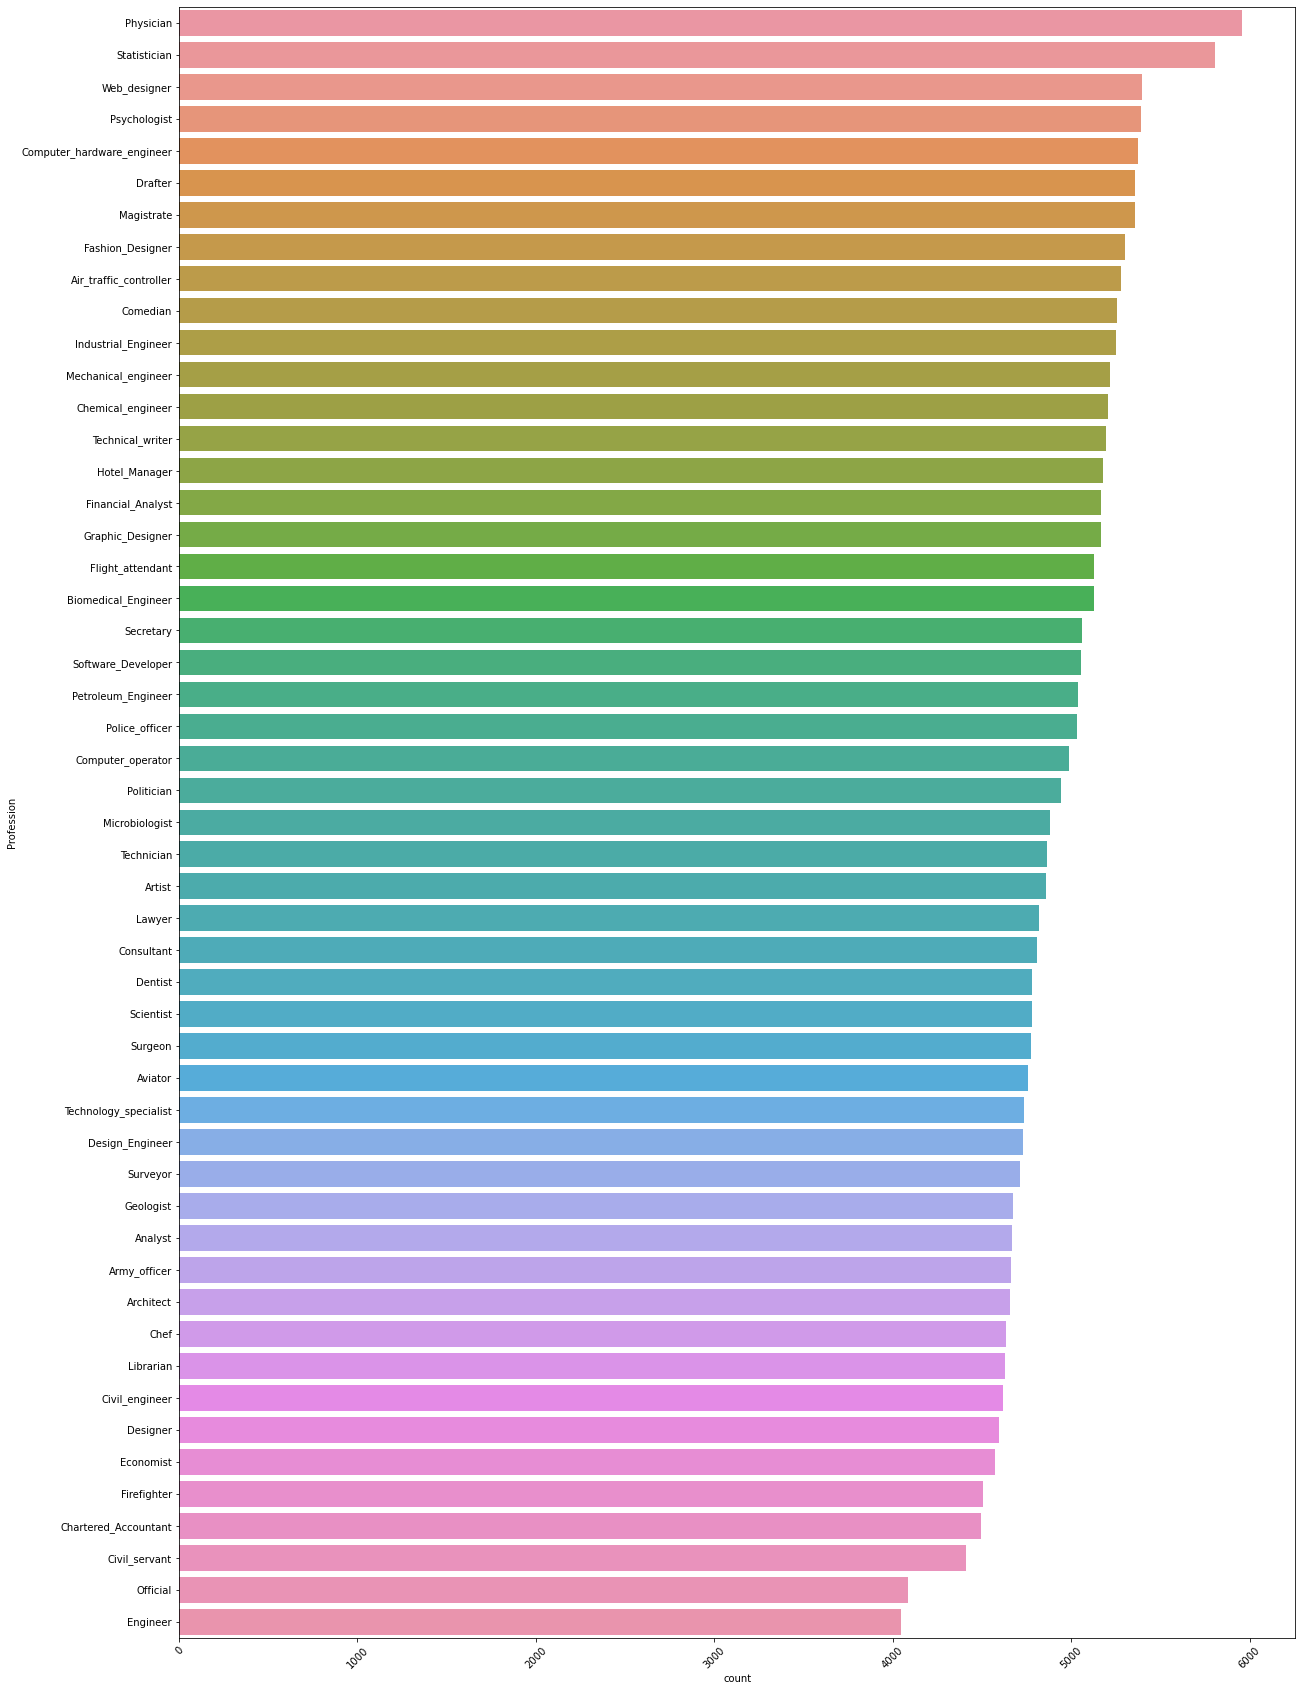

In [29]:
# Count plot of variable 'STATE'

plt.figure(figsize=(20,30))
sns.countplot( y=df['Profession'],order= df['Profession'].value_counts().index)
plt.xticks(rotation=45)
plt.show()

In [30]:
# Maximum people are physicians and minimum are engineer

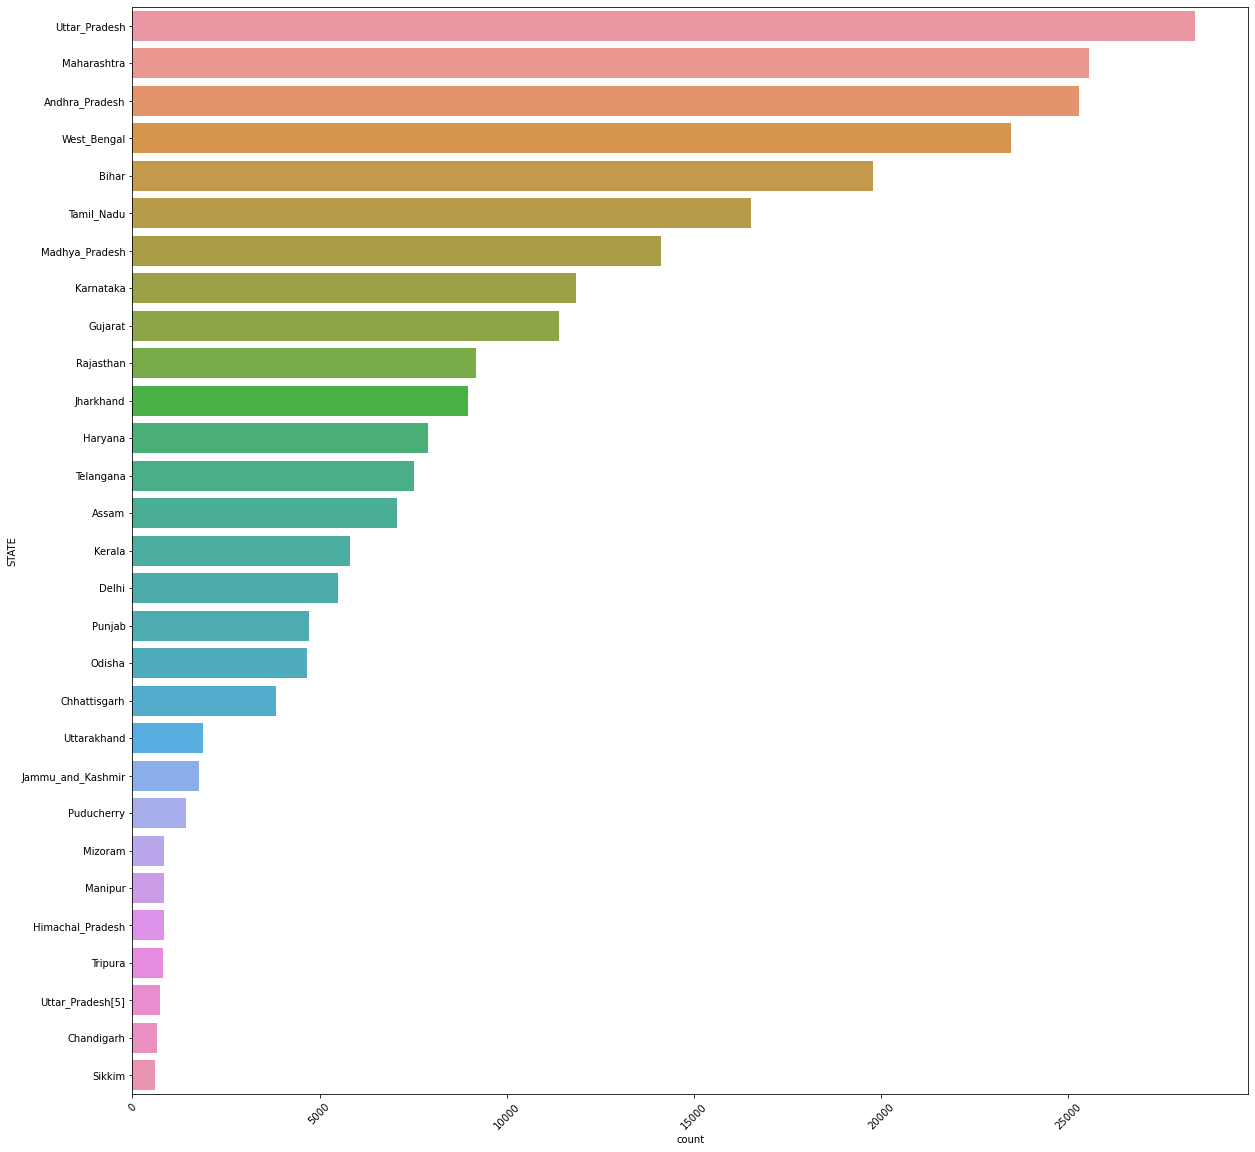

In [31]:

plt.figure(figsize=(20,20))
sns.countplot( y=df['STATE'],order= df['STATE'].value_counts().index)
plt.xticks(rotation=45)
plt.show()

In [32]:
# maximum people reside in Uttar Pradesh and minimum in Sikkim. 

<AxesSubplot:xlabel='Risk_Flag', ylabel='count'>

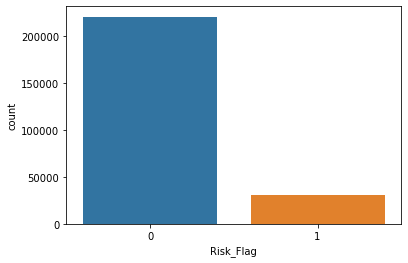

In [33]:
sns.countplot(df['Risk_Flag'])

In [34]:
percentage_count=df['Risk_Flag'].value_counts()/len(df)*100
percentage_count

0    87.7
1    12.3
Name: Risk_Flag, dtype: float64

In [35]:
#from the above graph we can say that most of the records in the risk flag variable is falls under zero class that yes (87%).

In [36]:
#data is imbalanced

<AxesSubplot:>

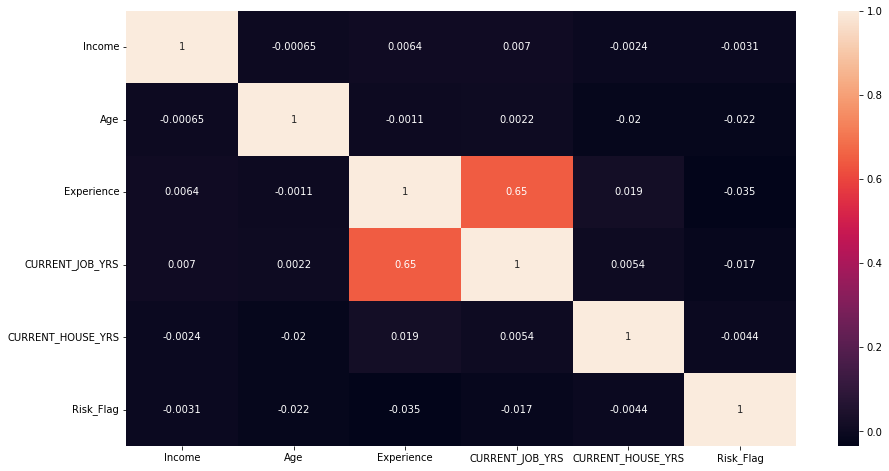

In [37]:
# Heatmap for checking correlation between the variables

plt.figure(figsize=(15,8))
sns.heatmap(df.corr(),annot=True)

In [38]:
# from the above heatmap it is observed that there is moderate correlation between 'Current_Job_yrs' and 'Experience'

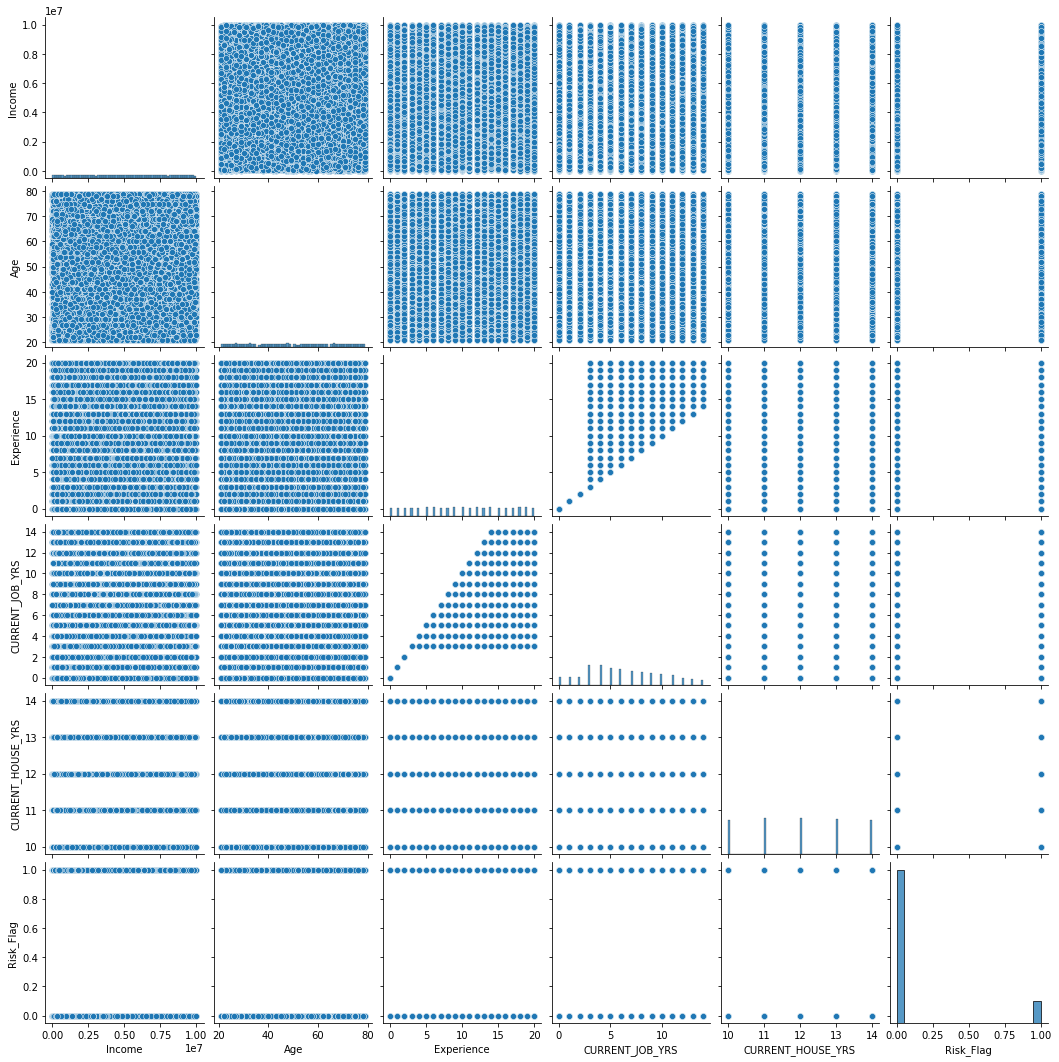

In [39]:
# Pairplot

sns.pairplot(df)

In [40]:
# Through this pairplot we infer that positive moderate corelation between CURRENT_JOB_YRS and Experience

# Bivariate analysis (numerical and categorical variables)¶

<AxesSubplot:xlabel='Married/Single', ylabel='Income'>

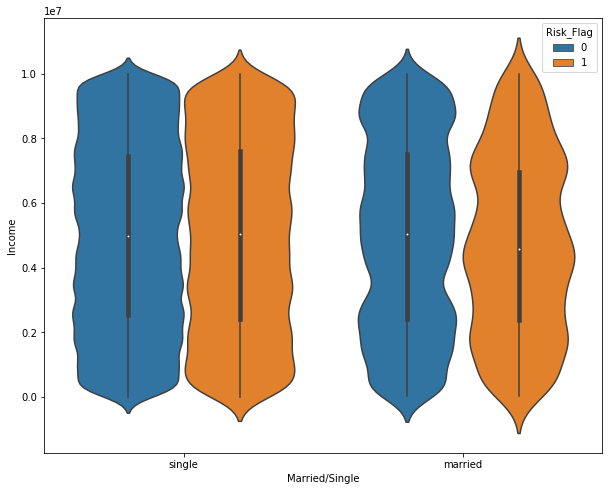

In [41]:
# Bivariate analysis between 'Married/Single' and 'Income' & 'Risk_Flag'

plt.figure(figsize=(10,8))
sns.violinplot(data=df,x='Married/Single',y='Income' ,hue='Risk_Flag')

from above  violin plot we can observe that risk of giving loan to single people is compiratively same but in married people the risk of giving loan is higher 

<AxesSubplot:xlabel='House_Ownership', ylabel='Income'>

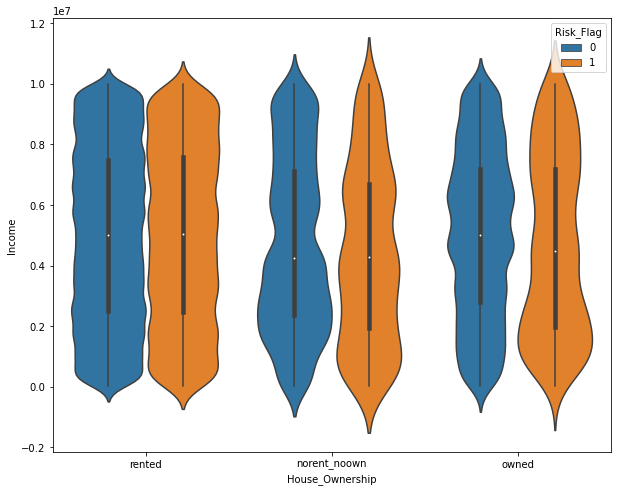

In [42]:
# Bivariate analysis between 'House_Ownership' and 'Income' and 'Risk_Flag'

plt.figure(figsize=(10,8))
sns.violinplot(data=df,x='House_Ownership',y='Income' ,hue='Risk_Flag')

In [43]:
df.columns

Index(['Income', 'Age', 'Experience', 'Married/Single', 'House_Ownership',
       'Car_Ownership', 'Profession', 'CITY', 'STATE', 'CURRENT_JOB_YRS',
       'CURRENT_HOUSE_YRS', 'Risk_Flag'],
      dtype='object')

<AxesSubplot:xlabel='House_Ownership', ylabel='Income'>

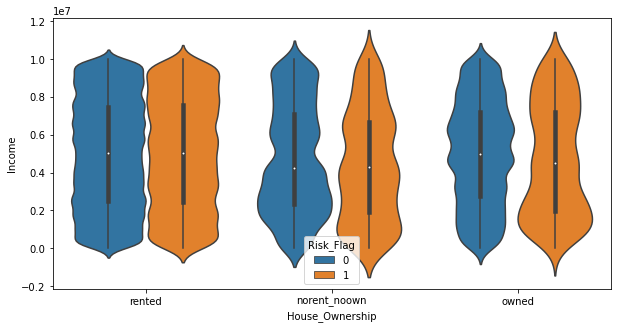

In [44]:

plt.figure(figsize=(10,5))
sns.violinplot(data=df,x='House_Ownership',y='Income' ,hue ='Risk_Flag')

# Categorical to Categorical Bivariate Analysis

<AxesSubplot:xlabel='Married/Single'>

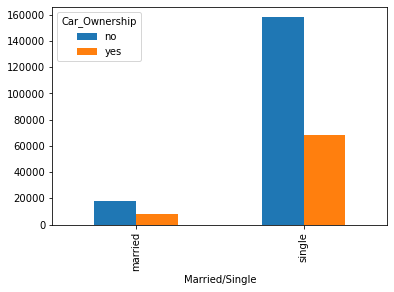

In [45]:
# Categorical to Categorical Bivariate Analysis between 'Married/Single' and 'Car_Ownership'

pd.crosstab(df['Married/Single'],df['Car_Ownership']).plot(kind='bar')

In [46]:
# Most of the persons don’t own a car irrespective whether they are married or not .

<AxesSubplot:xlabel='Married/Single'>

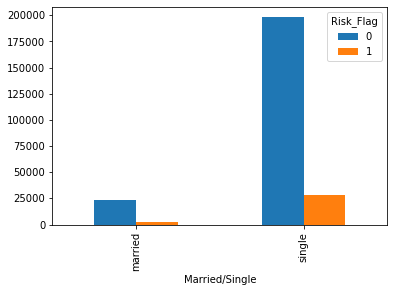

In [47]:
# Categorical to Categorical Bivariate Analysis between 'Married/Single' and 'Risk_Flag'

pd.crosstab(df['Married/Single'],df['Risk_Flag']).plot(kind='bar')

<AxesSubplot:xlabel='STATE'>

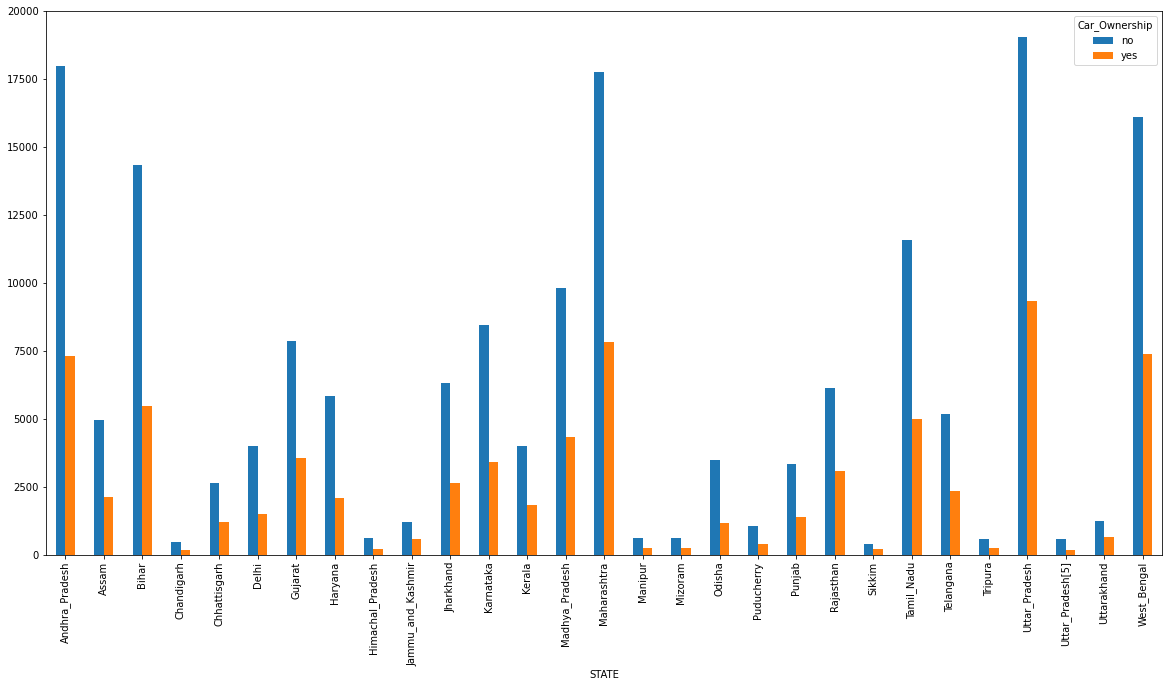

In [48]:
# Categorical to Categorical Bivariate Analysis between 'STATE' and 'Car_Ownership'

pd.crosstab(df['STATE'],df['Car_Ownership']).plot(kind='bar',figsize=(20,10))

In [49]:
# Uttar Pradesh has maximum car ownership followed by West Bengal and Andhra Pradesh.

<AxesSubplot:xlabel='STATE'>

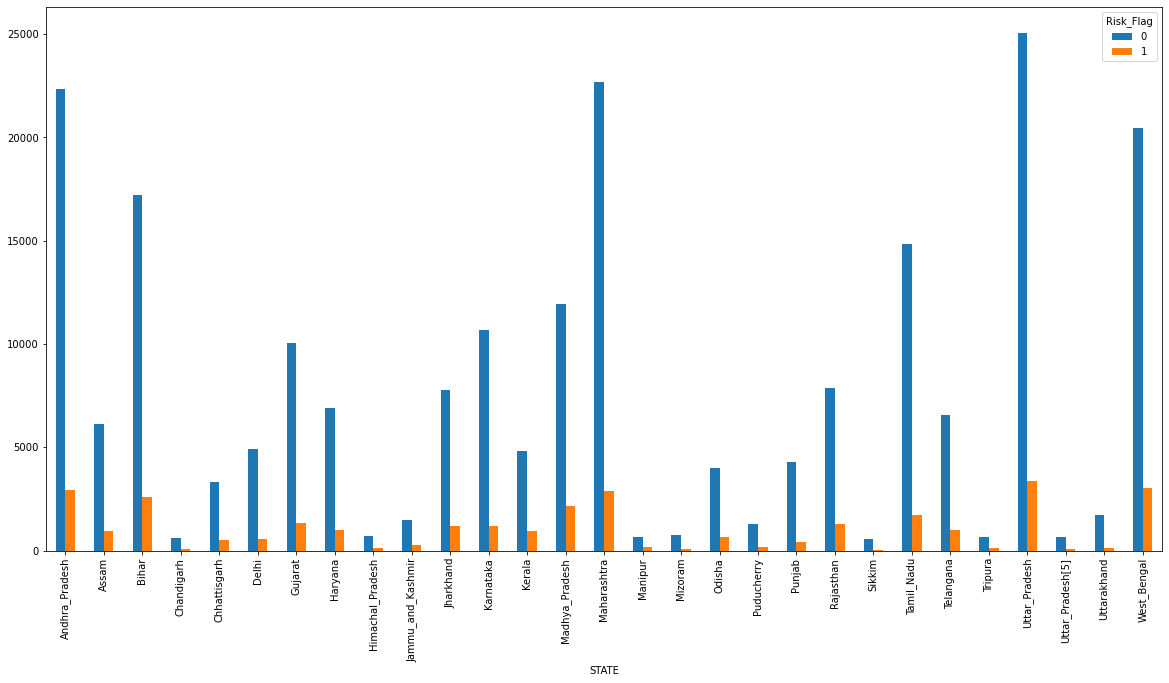

In [50]:
# Categorical to Categorical Bivariate Analysis between 'STATE' and 'Risk_Flag'

pd.crosstab(df['STATE'],df['Risk_Flag']).plot(kind='bar',figsize=(20,10))

<AxesSubplot:xlabel='Profession'>

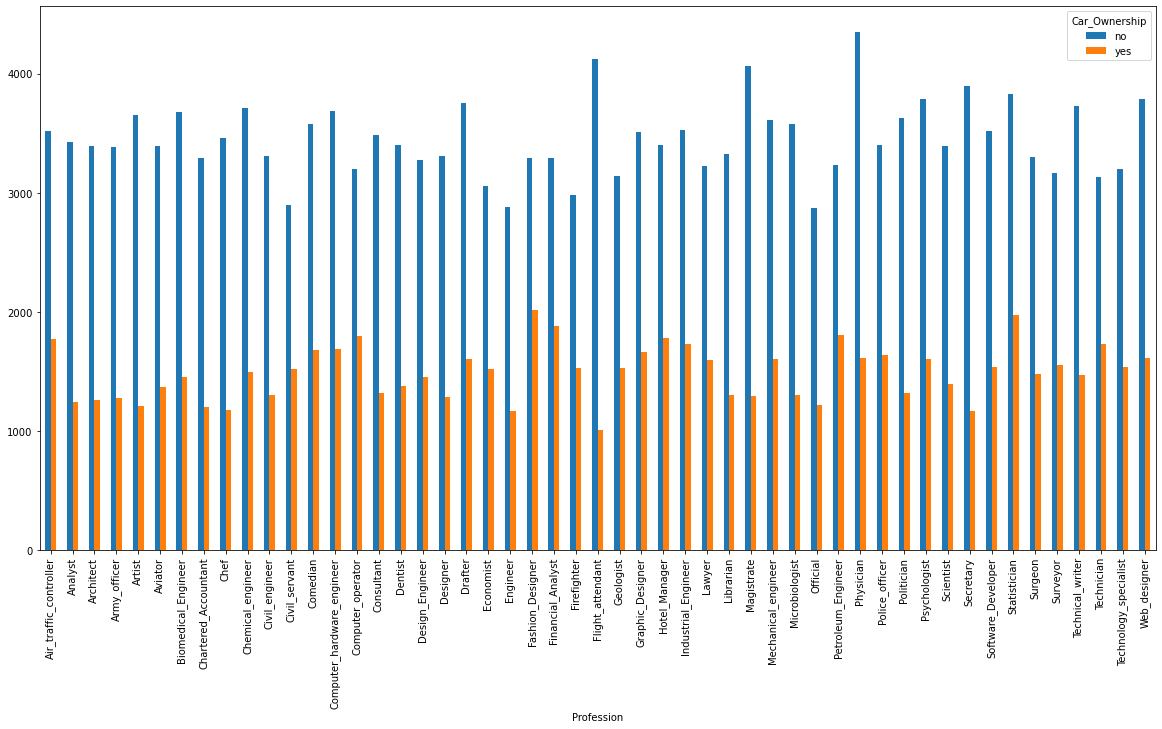

In [51]:
# Categorical to Categorical Bivariate Analysis between 'Profession' and 'Car_Ownership'

pd.crosstab(df['Profession'],df['Car_Ownership']).plot(kind='bar',figsize=(20,10))

In [52]:
# Fashion designer has maximum car ownership followed  by Financial Analyst and Petroleum Engineer and so on.

<AxesSubplot:xlabel='Profession'>

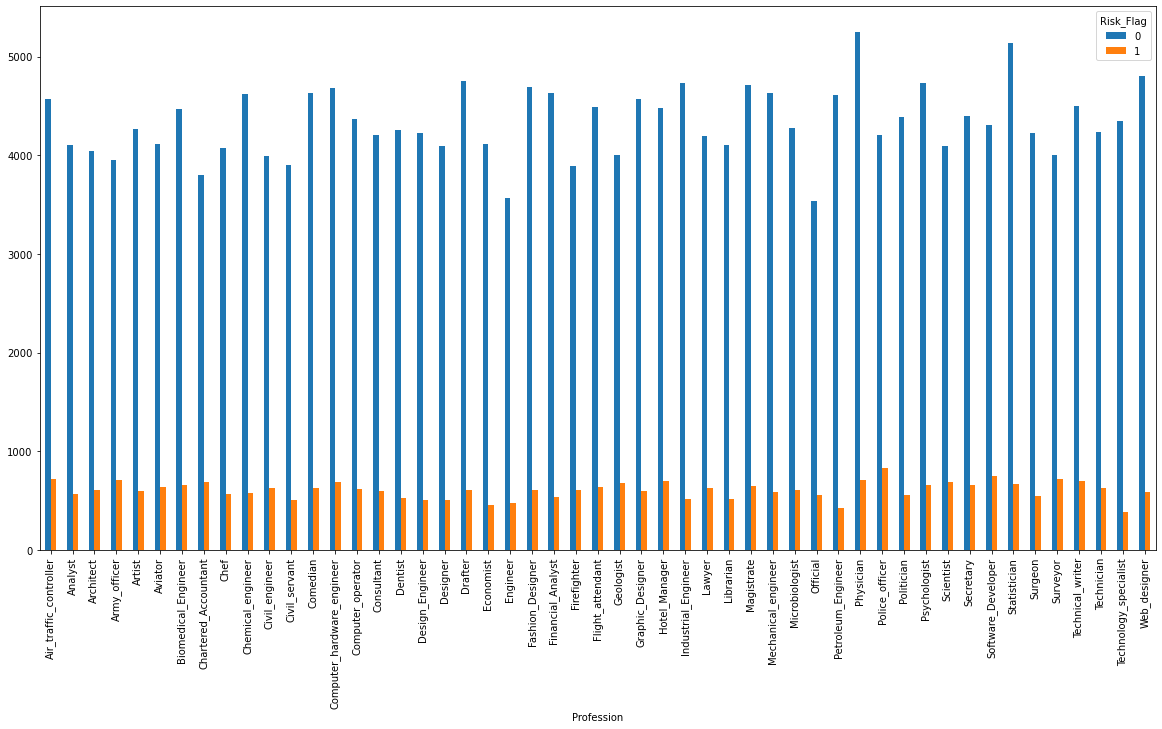

In [53]:
# Categorical to Categorical Bivariate Analysis between 'Profession' and 'Risk_Flag'

pd.crosstab(df['Profession'],df['Risk_Flag']).plot(kind='bar',figsize=(20,10))

In [54]:
# Target variable assigned to df_target

df_target =df['Risk_Flag']

In [55]:
# check for values in df_target
df_target

Id
1         0
2         0
3         0
4         1
5         1
         ..
251996    0
251997    0
251998    0
251999    0
252000    0
Name: Risk_Flag, Length: 252000, dtype: int64

In [56]:
df1=df

In [57]:
# dropping target variable from dataset

df=df.drop('Risk_Flag',axis=1)

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 252000 entries, 1 to 252000
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Income             252000 non-null  int64 
 1   Age                252000 non-null  int64 
 2   Experience         252000 non-null  int64 
 3   Married/Single     252000 non-null  object
 4   House_Ownership    252000 non-null  object
 5   Car_Ownership      252000 non-null  object
 6   Profession         252000 non-null  object
 7   CITY               252000 non-null  object
 8   STATE              252000 non-null  object
 9   CURRENT_JOB_YRS    252000 non-null  int64 
 10  CURRENT_HOUSE_YRS  252000 non-null  int64 
dtypes: int64(5), object(6)
memory usage: 31.1+ MB


In [59]:
# numerical and categorical variables are separated

df_num= df.select_dtypes(include=[np.number])
df_cat= df.select_dtypes(exclude=[np.number])

<AxesSubplot:>

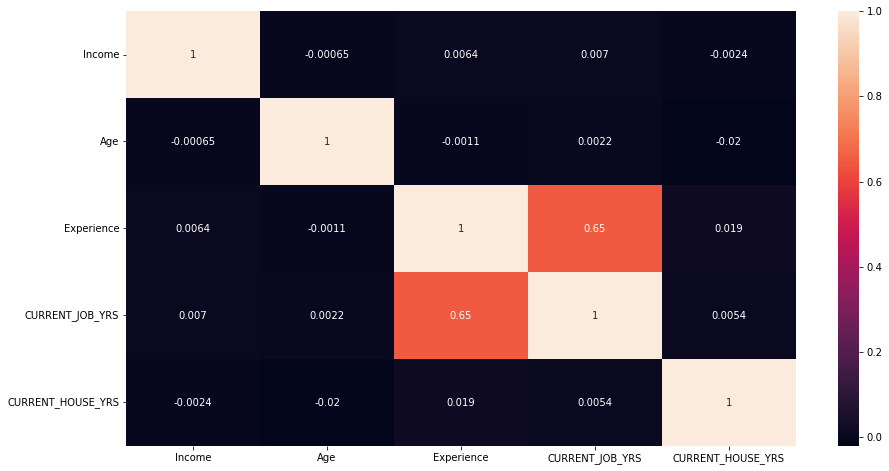

In [60]:
# check for correlation 

plt.figure(figsize=(15,8))
sns.heatmap(df.corr(),annot=True)

In [61]:
# check for variance

df.var()

Income               8.284674e+12
Age                  2.911751e+02
Experience           3.603108e+01
CURRENT_JOB_YRS      1.330100e+01
CURRENT_HOUSE_YRS    1.957304e+00
dtype: float64

In [62]:
# check for normality of features

df.skew()

Income               0.005958
Age                 -0.005316
Experience          -0.012779
CURRENT_JOB_YRS      0.273146
CURRENT_HOUSE_YRS    0.006786
dtype: float64

In [63]:
# dropping 'CITY' as it is adding to the complexity and is of no sifnificant use.

df_cat= df_cat.drop('CITY',axis=1)

In [64]:
from scipy.stats import shapiro

In [65]:
p_val ,stat =shapiro(df['Income'])
p_val

0.9552177786827087

In [66]:
p_val ,stat =shapiro(df['Age'])
p_val

0.9537878632545471

In [67]:
p_val ,stat =shapiro(df['Experience'])
p_val

0.9515970349311829

In [68]:
p_val ,stat =shapiro(df['CURRENT_JOB_YRS'])
p_val

0.9664273262023926

In [69]:
# Label encoding

le= LabelEncoder()

df_cat['Profession'] = le.fit_transform(df_cat['Profession'])

df_cat['STATE'] = le.fit_transform(df_cat['STATE'])

In [70]:
df_cat = pd.get_dummies(df_cat,drop_first=True)

In [71]:
df_cat.head()

,Profession,STATE,Married/Single_single,House_Ownership_owned,House_Ownership_rented,Car_Ownership_yes
Id,,,,,,
1,33,13,1,0,1,0
2,43,14,1,0,1,0
3,47,12,0,0,1,0
4,43,17,1,0,1,1
5,11,22,1,0,1,0


In [72]:
# check for multicollinearity between the features

vif = pd.DataFrame()
vif['VIF']= [variance_inflation_factor(df_num.values,i) for i in range(df_num.shape[1])]
vif['Features'] = df_num.columns
vif

,VIF,Features
0,3.879021,Income
1,8.556036,Age
2,6.541820,Experience
3,6.830915,CURRENT_JOB_YRS
4,13.281953,CURRENT_HOUSE_YRS


In [73]:
# dropping Current_House_yrs as it is having high multicollinearity

df_num =df_num.drop('CURRENT_HOUSE_YRS',axis=1)

In [74]:
#re-checking the multicollinearity

vif = pd.DataFrame()
vif['VIF']= [variance_inflation_factor(df_num.values,i) for i in range(df_num.shape[1])]
vif['Features'] = df_num.columns
vif

,VIF,Features
0,3.272554,Income
1,4.471975,Age
2,6.340418,Experience
3,6.594917,CURRENT_JOB_YRS


In [75]:
#MinMax scaling

mm=MinMaxScaler()

In [76]:
df_num_scaled = mm.fit_transform(df_num)
df_cat_scaled= mm.fit_transform(df_cat)

In [77]:
df_num = pd.DataFrame(df_num_scaled, columns= df_num.columns)
df_num.head()

,Income,Age,Experience,CURRENT_JOB_YRS
0,0.129487,0.034483,0.15,0.214286
1,0.757206,0.327586,0.50,0.642857
2,0.398564,0.775862,0.20,0.285714
3,0.625263,0.344828,0.10,0.142857
4,0.576454,0.448276,0.55,0.214286


In [78]:
df_cat=pd.DataFrame(df_cat_scaled, columns= df_cat.columns)
df_cat.head()

,Profession,STATE,Married/Single_single,House_Ownership_owned,House_Ownership_rented,Car_Ownership_yes
0,0.66,0.464286,1.0,0.0,1.0,0.0
1,0.86,0.500000,1.0,0.0,1.0,0.0
2,0.94,0.428571,0.0,0.0,1.0,0.0
3,0.86,0.607143,1.0,0.0,1.0,1.0
4,0.22,0.785714,1.0,0.0,1.0,0.0


In [79]:
# joining the numerical and categorical features after scaling

df_final =df_num.join(df_cat,on= df_cat.index)

In [80]:
df_final= df_final.join(df_target,on=df_target.index)

In [81]:
df_target =pd.DataFrame(df_target)

In [82]:
df_target = df_target.reset_index(drop=True)

In [83]:
df_final.isnull().sum()

Income                    0
Age                       0
Experience                0
CURRENT_JOB_YRS           0
Profession                0
STATE                     0
Married/Single_single     0
House_Ownership_owned     0
House_Ownership_rented    0
Car_Ownership_yes         0
Risk_Flag                 0
dtype: int64

In [84]:
#dataset after scaling

df_final

,Income,Age,Experience,CURRENT_JOB_YRS,Profession,STATE,Married/Single_single,House_Ownership_owned,House_Ownership_rented,Car_Ownership_yes,Risk_Flag
0,0.129487,0.034483,0.15,0.214286,0.66,0.464286,1.0,0.0,1.0,0.0,0
1,0.757206,0.327586,0.50,0.642857,0.86,0.500000,1.0,0.0,1.0,0.0,0
2,0.398564,0.775862,0.20,0.285714,0.94,0.428571,0.0,0.0,1.0,0.0,0
3,0.625263,0.344828,0.10,0.142857,0.86,0.607143,1.0,0.0,1.0,1.0,1
4,0.576454,0.448276,0.55,0.214286,0.22,0.785714,1.0,0.0,1.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
251995,0.815303,0.379310,0.65,0.428571,0.90,1.000000,1.0,0.0,1.0,0.0,0
251996,0.283620,0.086207,0.50,0.428571,0.06,0.464286,1.0,0.0,1.0,0.0,0
251997,0.451682,0.431034,0.35,0.500000,0.34,0.500000,1.0,0.0,1.0,0.0,0
251998,0.650356,0.413793,0.00,0.000000,0.54,0.642857,1.0,0.0,1.0,0.0,0


In [85]:
# SMOTE as our target variable is imbalanced

sm = SMOTE(sampling_strategy='minority', random_state=1)

In [86]:
oversampled_trainX, oversampled_trainY = sm.fit_resample(df_final.drop('Risk_Flag', axis=1), df_final['Risk_Flag'])

In [87]:
df_smotted = pd.concat([pd.DataFrame(oversampled_trainY), pd.DataFrame(oversampled_trainX)], axis=1)

In [88]:
df_smotted['Risk_Flag'].value_counts()

0    221004
1    221004
Name: Risk_Flag, dtype: int64

In [89]:
# assigning target and independent variables

X= df_smotted.drop('Risk_Flag',axis=1)
y= df_smotted['Risk_Flag']

In [90]:
# splittig the dataset into train and test

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1)

In [91]:
# shape of X_train

X_train.shape

(309405, 10)

In [92]:
# statistically verifying the split

len(X_train)/len(X)

0.6999986425585057

In [93]:
len(X_test)/len(X)

0.30000135744149425

In [94]:
# creating the Base Model : Logistic Regression

In [95]:
#Base Model

lr = LogisticRegression()

Mod_base = lr.fit(X_train,y_train)

In [96]:
y_pred = Mod_base.predict(X_train)

In [97]:
r1_train=Mod_base.score(X_train,y_train)
r1_train

0.5350753866291753

In [98]:
r1_test=Mod_base.score(X_test,y_test)
r1_test

0.5343921329080036

In [99]:
y_pred_train= Mod_base.predict(X_train)
y_pred_test= Mod_base.predict(X_test)

In [100]:
#train

print(classification_report(y_train,y_pred_train))

              precision    recall  f1-score   support

           0       0.54      0.50      0.52    154643
           1       0.53      0.57      0.55    154762

    accuracy                           0.54    309405
   macro avg       0.54      0.54      0.53    309405
weighted avg       0.54      0.54      0.53    309405



In [101]:
#test

print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       0.54      0.50      0.52     66361
           1       0.53      0.57      0.55     66242

    accuracy                           0.53    132603
   macro avg       0.53      0.53      0.53    132603
weighted avg       0.53      0.53      0.53    132603



In [102]:
# storing the results into one dataframe

results_df = pd.DataFrame({'Score': [r1_test]},index=['Logistic Regression'])
results_df

,Score
Logistic Regression,0.534392


In [103]:
# RFE to get the best features 

In [104]:
rfe_model = RFE(RandomForestClassifier(),n_features_to_select= 7)
rfe_model= rfe_model.fit(X_train,y_train)

In [105]:
feature_index= pd.Series(data= rfe_model.ranking_, index= X_train.columns)
significant_features = feature_index[feature_index==1].index
significant_features

Index(['Income', 'Age', 'Experience', 'CURRENT_JOB_YRS', 'Profession', 'STATE',
       'Car_Ownership_yes'],
      dtype='object')

In [106]:
# assigning the significant features received from RFE to new train and test

X_train_new = X_train[significant_features]
X_test_new= X_test[significant_features]

In [107]:
# Random forest classifier

rf= RandomForestClassifier()
rf.fit(X_train_new,y_train)

RandomForestClassifier()

In [108]:
y_pred_rf_train= rf.predict(X_train_new)
y_pred_rf_test= rf.predict(X_test_new)

In [109]:
# train score of Random Forest

r2_train=rf.score(X_train_new,y_train)
r2_train

0.9571855658441202

In [110]:
# test score of Random Forest

r2_test=rf.score(X_test_new,y_test)
r2_test

0.9417132342405526

In [111]:
# classification report of train 

print(classification_report(y_train,y_pred_rf_train))

              precision    recall  f1-score   support

           0       1.00      0.91      0.96    154643
           1       0.92      1.00      0.96    154762

    accuracy                           0.96    309405
   macro avg       0.96      0.96      0.96    309405
weighted avg       0.96      0.96      0.96    309405



In [112]:
# classification report of test

print(classification_report(y_test,y_pred_rf_test))

              precision    recall  f1-score   support

           0       0.98      0.91      0.94     66361
           1       0.91      0.98      0.94     66242

    accuracy                           0.94    132603
   macro avg       0.94      0.94      0.94    132603
weighted avg       0.94      0.94      0.94    132603



In [113]:
# storing the results in dataframe

results_df_2 = pd.DataFrame({'Score': [r2_test]},index=['Random Forest'])

results_df = pd.concat([results_df, results_df_2])
results_df

,Score
Logistic Regression,0.534392
Random Forest,0.941713


In [114]:
from sklearn.model_selection import cross_val_score

In [115]:
mean_absolute_error(y_train,y_pred_rf_train)

0.042814434155879835

In [116]:
mean_absolute_error(y_test,y_pred_rf_test)

0.05828676575944737

In [117]:
# confusion matrix of train : Random Forest

cm = confusion_matrix(y_train, y_pred_rf_train)
cm

array([[141396,  13247],
       [     0, 154762]], dtype=int64)

In [118]:
# confusion matrix of test : Random Forest

cm = confusion_matrix(y_test, y_pred_rf_test)
cm

array([[60128,  6233],
       [ 1496, 64746]], dtype=int64)

In [119]:
# Decision tree classifier

dtf= DecisionTreeClassifier()
dtf.fit(X_train_new,y_train)

DecisionTreeClassifier()

In [120]:
y_pred_dtf_train= dtf.predict(X_train_new)
y_pred_dtf_test= dtf.predict(X_test_new)

In [121]:
# classification report of train : Decison Tree classifier

print(classification_report(y_train,y_pred_dtf_train))

              precision    recall  f1-score   support

           0       1.00      0.91      0.96    154643
           1       0.92      1.00      0.96    154762

    accuracy                           0.96    309405
   macro avg       0.96      0.96      0.96    309405
weighted avg       0.96      0.96      0.96    309405



In [122]:
# classification report of train : Decison Tree classifier

print(classification_report(y_test,y_pred_dtf_test))

              precision    recall  f1-score   support

           0       0.96      0.88      0.92     66361
           1       0.89      0.96      0.92     66242

    accuracy                           0.92    132603
   macro avg       0.92      0.92      0.92    132603
weighted avg       0.92      0.92      0.92    132603



In [123]:
# train score of Decision Tree

r3_train=dtf.score(X_train_new,y_train)
r3_train

0.9571855658441202

In [124]:
# test score of Decision Tree

r3_test=dtf.score(X_test_new,y_test)
r3_test

0.9194663770804582

In [125]:
# storing the results in dataframe

results_df_3 = pd.DataFrame({'Score': [r3_test]},index=['Decision Tree'])

results_df = pd.concat([results_df, results_df_3])
results_df

,Score
Logistic Regression,0.534392
Random Forest,0.941713
Decision Tree,0.919466


In [127]:
ada = AdaBoostClassifier(base_estimator=dtf,random_state=1)

In [128]:
tuned_param= [ {'learning_rate':[0.1,0.01,0.001,0.15,0.015] } ]

In [130]:
# Grid search to get best parameters

ada_grid= GridSearchCV(estimator=ada, param_grid= tuned_param, cv=3, n_jobs=-1)

In [131]:
ada_grid.fit(X_train_new, y_train)

GridSearchCV(cv=3,
             estimator=AdaBoostClassifier(base_estimator=DecisionTreeClassifier(),
                                          random_state=1),
             n_jobs=-1,
             param_grid=[{'learning_rate': [0.1, 0.01, 0.001, 0.15, 0.015]}])

In [133]:
# best parameters from grid search

ada_grid.best_params_

{'learning_rate': 0.01}

In [134]:
ada = AdaBoostClassifier(base_estimator=dtf,random_state=1,n_estimators= 10,learning_rate=0.015)

In [135]:
# fitting the model

ada.fit(X_train_new,y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), learning_rate=0.015,
                   n_estimators=10, random_state=1)

In [136]:
y_pred_ada_train= ada.predict(X_train_new)
y_pred_ada_test= ada.predict(X_test_new)

In [137]:
# classification report of train : Ada Boost

print(classification_report(y_train,y_pred_ada_train))

              precision    recall  f1-score   support

           0       1.00      0.91      0.96    154643
           1       0.92      1.00      0.96    154762

    accuracy                           0.96    309405
   macro avg       0.96      0.96      0.96    309405
weighted avg       0.96      0.96      0.96    309405



In [138]:
# classification report of test : Ada Boost

print(classification_report(y_test,y_pred_ada_test))

              precision    recall  f1-score   support

           0       0.97      0.90      0.93     66361
           1       0.90      0.97      0.93     66242

    accuracy                           0.93    132603
   macro avg       0.93      0.93      0.93    132603
weighted avg       0.93      0.93      0.93    132603



In [139]:
mean_absolute_error(y_train,y_pred_ada_train)

0.042814434155879835

In [140]:
mean_absolute_error(y_test,y_pred_ada_test)

0.0674569956939134

In [141]:
# confusion matrix of train : Ada Boost

confusion_matrix(y_train,y_pred_ada_train)

array([[141396,  13247],
       [     0, 154762]], dtype=int64)

In [142]:
# confusion matrix of test : Ada Boost

confusion_matrix(y_test,y_pred_ada_test)

array([[59403,  6958],
       [ 1987, 64255]], dtype=int64)

In [143]:
# train score of Ada Boost

r4_train=ada.score(X_train_new,y_train)
r4_train

0.9571855658441202

In [144]:
# test score of Ada Boost

r4_test=ada.score(X_test_new,y_test)
r4_test

0.9325430043060866

In [145]:
# storing the results in dataframe

results_df_4 = pd.DataFrame({'Score': [r4_test]},index=['Ada Boost on DT'])
results_df = pd.concat([results_df, results_df_4])
results_df

,Score
Logistic Regression,0.534392
Random Forest,0.941713
Decision Tree,0.919466
Ada Boost on DT,0.932543


In [146]:
# Gradient Boosting

In [147]:
gb_model= GradientBoostingClassifier(n_estimators=10,max_depth =5)

In [148]:
# fitting the model

gb_model.fit(X_train_new,y_train)

GradientBoostingClassifier(max_depth=5, n_estimators=10)

In [149]:
y_pred_gb_train=gb_model.predict(X_train_new)
y_pred_gb_test= gb_model.predict(X_test_new)

In [150]:
# classification report of train : Gradient Boosting

print(classification_report(y_train,y_pred_gb_train))

              precision    recall  f1-score   support

           0       0.59      0.70      0.64    154643
           1       0.63      0.52      0.57    154762

    accuracy                           0.61    309405
   macro avg       0.61      0.61      0.60    309405
weighted avg       0.61      0.61      0.60    309405



In [151]:
# classification report of train : Gradient Boosting

print(classification_report(y_test,y_pred_gb_test))

              precision    recall  f1-score   support

           0       0.59      0.70      0.64     66361
           1       0.63      0.52      0.57     66242

    accuracy                           0.61    132603
   macro avg       0.61      0.61      0.60    132603
weighted avg       0.61      0.61      0.60    132603



In [152]:
mean_absolute_error(y_train,y_pred_gb_train)

0.39166464666052586

In [153]:
mean_absolute_error(y_test,y_pred_gb_test)

0.39383724350127824

In [154]:
# confusion matrix of train : Gradient Boosting

confusion_matrix(y_train,y_pred_gb_train)

array([[108459,  46184],
       [ 74999,  79763]], dtype=int64)

In [155]:
# confusion matrix of test : Gradient Boosting

confusion_matrix(y_test,y_pred_gb_test)

array([[46250, 20111],
       [32113, 34129]], dtype=int64)

In [156]:
# score of train Gradient Boosting

r5_train=gb_model.score(X_train_new,y_train)
r5_train

0.6083353533394742

In [157]:
# score of test Gradient Boosting

r5_test=gb_model.score(X_test_new,y_test)
r5_test

0.6061627564987218

In [158]:
# storing the results in dataframe

results_df_5 = pd.DataFrame({'Score': [r5_test]},index=['Gradient Boost'])

results_df = pd.concat([results_df, results_df_5])
results_df

,Score
Logistic Regression,0.534392
Random Forest,0.941713
Decision Tree,0.919466
Ada Boost on DT,0.932543
Gradient Boost,0.606163


In [159]:
# XG Boost

In [160]:
xgb_model = XGBClassifier(learning_rate = 0.015)

In [161]:
#fitting the model

xgb_model.fit(X_train_new,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.015, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [162]:
y_pred_xg_train=xgb_model.predict(X_train_new)
y_pred_xg_test= xgb_model.predict(X_test_new)

In [163]:
# classification report of train : XG Boost

print(classification_report(y_train,y_pred_xg_train))

              precision    recall  f1-score   support

           0       0.64      0.73      0.68    154643
           1       0.68      0.58      0.63    154762

    accuracy                           0.66    309405
   macro avg       0.66      0.66      0.65    309405
weighted avg       0.66      0.66      0.65    309405



In [164]:
# classification report of test : XG Boost

print(classification_report(y_test,y_pred_xg_test))

              precision    recall  f1-score   support

           0       0.63      0.73      0.68     66361
           1       0.68      0.58      0.63     66242

    accuracy                           0.65    132603
   macro avg       0.66      0.65      0.65    132603
weighted avg       0.66      0.65      0.65    132603



In [165]:
mean_absolute_error(y_train,y_pred_xg_train)

0.3444869992404777

In [166]:
mean_absolute_error(y_test,y_pred_xg_test)

0.3471037608500562

In [167]:
confusion_matrix(y_train,y_pred_xg_train)

array([[112834,  41809],
       [ 64777,  89985]], dtype=int64)

In [168]:
confusion_matrix(y_test,y_pred_xg_test)

array([[48130, 18231],
       [27796, 38446]], dtype=int64)

In [169]:
# score of train XG Boost

r6_train=xgb_model.score(X_train_new,y_train)
r6_train

0.6555130007595223

In [170]:
# score of test XG Boost

r6_test=xgb_model.score(X_test_new,y_test)
r6_test

0.6528962391499438

In [171]:
# storing the results in dataframe

results_df_6 = pd.DataFrame({'Score': [r6_test]},index=['XG Boost'])

results_df = pd.concat([results_df, results_df_6])
results_df

,Score
Logistic Regression,0.534392
Random Forest,0.941713
Decision Tree,0.919466
Ada Boost on DT,0.932543
Gradient Boost,0.606163
XG Boost,0.652896


In [172]:
# balanced bagging classifier

In [173]:
bbc= BalancedBaggingClassifier(base_estimator= DecisionTreeClassifier(),sampling_strategy='auto', replacement= False, random_state=1)

In [174]:
#fitting the model

bbc.fit(X_train_new,y_train)

BalancedBaggingClassifier(base_estimator=DecisionTreeClassifier(),
                          random_state=1)

In [175]:
y_pred_train_bbc= bbc.predict(X_train_new)
y_pred_test_bbc= bbc.predict(X_test_new)

In [176]:
# classification report of train : Balanced bagging

print(classification_report(y_train,y_pred_train_bbc))

              precision    recall  f1-score   support

           0       1.00      0.91      0.95    154643
           1       0.92      1.00      0.96    154762

    accuracy                           0.96    309405
   macro avg       0.96      0.96      0.96    309405
weighted avg       0.96      0.96      0.96    309405



In [177]:
#classification report of test : Balanced bagging

print(classification_report(y_test,y_pred_test_bbc))

              precision    recall  f1-score   support

           0       0.96      0.90      0.93     66361
           1       0.91      0.97      0.94     66242

    accuracy                           0.93    132603
   macro avg       0.94      0.93      0.93    132603
weighted avg       0.94      0.93      0.93    132603



In [178]:
# score of train Balanced bagging

r7_train=bbc.score(X_train_new,y_train)
r7_train

0.9559541701006771

In [179]:
# score of test Balanced bagging

r7_test=bbc.score(X_test_new,y_test)
r7_test

0.9330105653718241

In [180]:
# storing the results in dataframe

results_df_7 = pd.DataFrame({'Score': [r7_test]},index=['Balanced Bagging Classifier'])

results_df = pd.concat([results_df, results_df_7])
results_df

,Score
Logistic Regression,0.534392
Random Forest,0.941713
Decision Tree,0.919466
Ada Boost on DT,0.932543
Gradient Boost,0.606163
XG Boost,0.652896
Balanced Bagging Classifier,0.933011


In [181]:
# sorting the results dataframe in descending order

results_df= results_df.sort_values(by='Score',ascending=False)

In [182]:
results_df

,Score
Random Forest,0.941713
Balanced Bagging Classifier,0.933011
Ada Boost on DT,0.932543
Decision Tree,0.919466
XG Boost,0.652896
Gradient Boost,0.606163
Logistic Regression,0.534392


The best results are given by Random Forest classifier and using that we are able to predict with 94% accuracy.

In [183]:
#model validation

cross_score= cross_val_score(estimator=RandomForestClassifier(),X=X_train_new,y=y_train,cv=5)
cross_score

array([0.94059566, 0.93889885, 0.9392059 , 0.93872109, 0.93896349])

In [184]:
#clustering

In [185]:
df1=df1.drop(['CITY','CURRENT_HOUSE_YRS'],axis=1)
df1.head()

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,STATE,CURRENT_JOB_YRS,Risk_Flag
Id,,,,,,,,,,
1,1303834,23,3,single,rented,no,Mechanical_engineer,Madhya_Pradesh,3,0
2,7574516,40,10,single,rented,no,Software_Developer,Maharashtra,9,0
3,3991815,66,4,married,rented,no,Technical_writer,Kerala,4,0
4,6256451,41,2,single,rented,yes,Software_Developer,Odisha,2,1
5,5768871,47,11,single,rented,no,Civil_servant,Tamil_Nadu,3,1


In [186]:
df_cluster= df1[df1['Risk_Flag']==1.0]

In [187]:
df_cluster.head()

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,STATE,CURRENT_JOB_YRS,Risk_Flag
Id,,,,,,,,,,
4,6256451,41,2,single,rented,yes,Software_Developer,Odisha,2,1
5,5768871,47,11,single,rented,no,Civil_servant,Tamil_Nadu,3,1
15,9420838,48,6,single,rented,no,Technical_writer,Tamil_Nadu,6,1
18,3666346,56,12,single,rented,no,Politician,Maharashtra,12,1
29,8832725,64,5,single,rented,no,Biomedical_Engineer,Puducherry,5,1


In [188]:
from sklearn.cluster import KMeans

In [189]:
df_cluster_1= df_final[df_final['Risk_Flag']==1.0]

In [190]:
wcss=[]
for i in range(2,8):
    kmean= KMeans(i)
    kmean.fit(df_cluster_1)
    wcss.append(kmean.inertia_)
wcss

[21969.18389764581,
 19630.614076315513,
 17679.488778264375,
 16021.657792839556,
 15280.45521228779,
 14565.961268587]

In [191]:
from sklearn.metrics import silhouette_score
sc_score=[]
for i in range(2,8):
    kmean=KMeans(i)
    kmean.fit(df_cluster_1)
    label=kmean.predict(df_cluster_1)
    print(f'silhouette score : {silhouette_score(df_cluster_1,label)}')
    sc_score.append(silhouette_score(df_cluster_1,label))

silhouette score : 0.261746065529573
silhouette score : 0.17386800469258692
silhouette score : 0.18415585533558207
silhouette score : 0.16946233292451648
silhouette score : 0.1810445048880133
silhouette score : 0.16028668468755322


In [192]:
#k-means

cluster_model= KMeans(2)
m=cluster_model.fit(df_cluster_1)

In [193]:
df_cluster['cluster']= m.labels_

df_cluster['cluster'].value_counts()

0    22561
1     8435
Name: cluster, dtype: int64

In [194]:
l0=df_cluster[df_cluster['cluster']==0]
l1=df_cluster[df_cluster['cluster']==1]


In [195]:
df_cluster_1.columns

Index(['Income', 'Age', 'Experience', 'CURRENT_JOB_YRS', 'Profession', 'STATE',
       'Married/Single_single', 'House_Ownership_owned',
       'House_Ownership_rented', 'Car_Ownership_yes', 'Risk_Flag'],
      dtype='object')

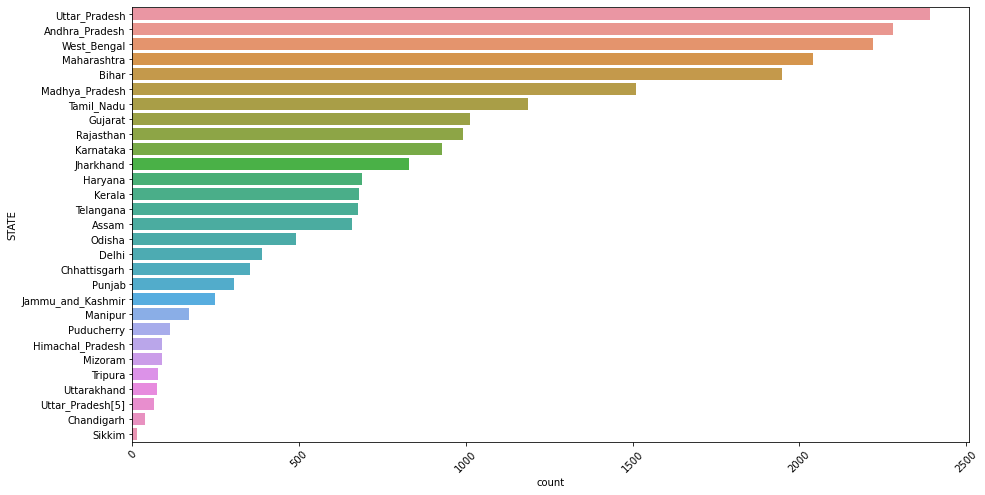

In [196]:
plt.figure(figsize=(15,8))
sns.countplot( y=l0['STATE'],order= l0['STATE'].value_counts().index)
plt.xticks(rotation=45)
plt.show()

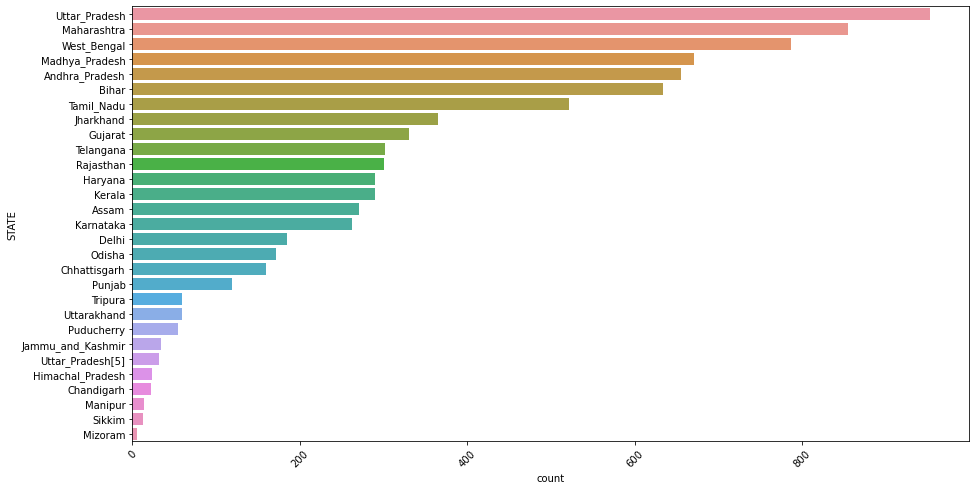

In [197]:
plt.figure(figsize=(15,8))
sns.countplot( y=l1['STATE'],order= l1['STATE'].value_counts().index)
plt.xticks(rotation=45)
plt.show()

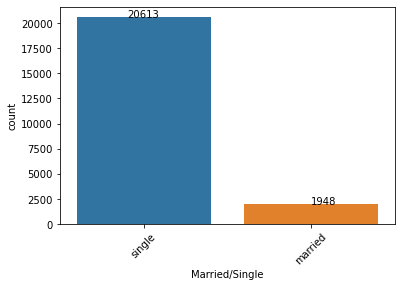

In [199]:

sns.countplot( x=l0['Married/Single'],order= l0['Married/Single'].value_counts().index)
plt.text(x=1,y=l0['Married/Single'].value_counts()[1]+2,s=l0['Married/Single'].value_counts()[1])
plt.text(x=-0.1,y=l0['Married/Single'].value_counts()[0]+3,s=l0['Married/Single'].value_counts()[0])
plt.xticks(rotation=45)
plt.show()

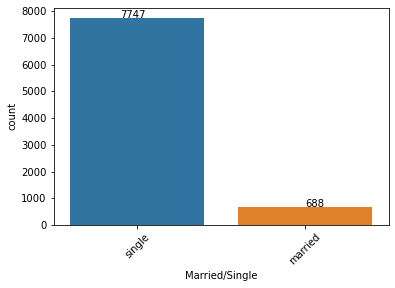

In [200]:
sns.countplot( x=l1['Married/Single'],order= l1['Married/Single'].value_counts().index)
plt.text(x=1,y=l1['Married/Single'].value_counts()[1]+2,s=l1['Married/Single'].value_counts()[1])
plt.text(x=-0.1,y=l1['Married/Single'].value_counts()[0]+3,s=l1['Married/Single'].value_counts()[0])
plt.xticks(rotation=45)
plt.show()

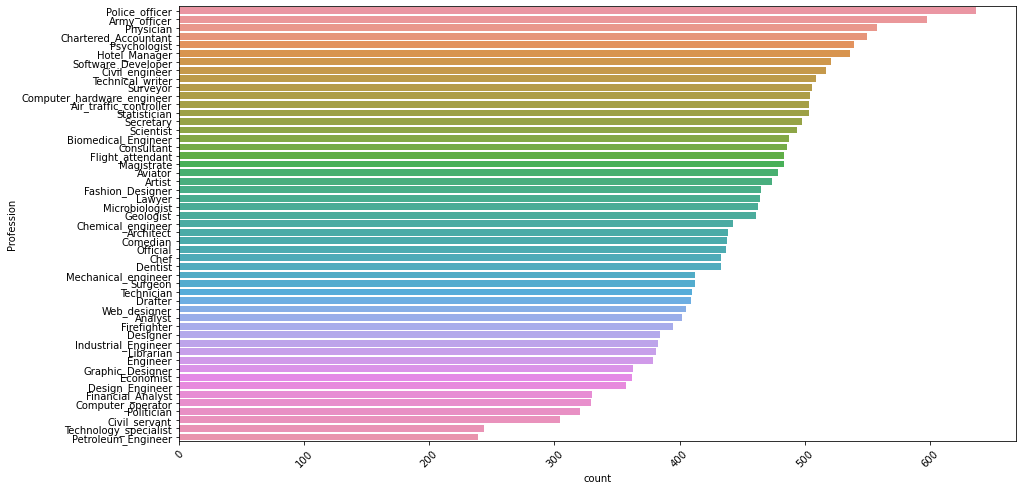

In [201]:
plt.figure(figsize=(15,8))
sns.countplot( y=l0['Profession'],order= l0['Profession'].value_counts().index)
plt.xticks(rotation=45)
plt.show()

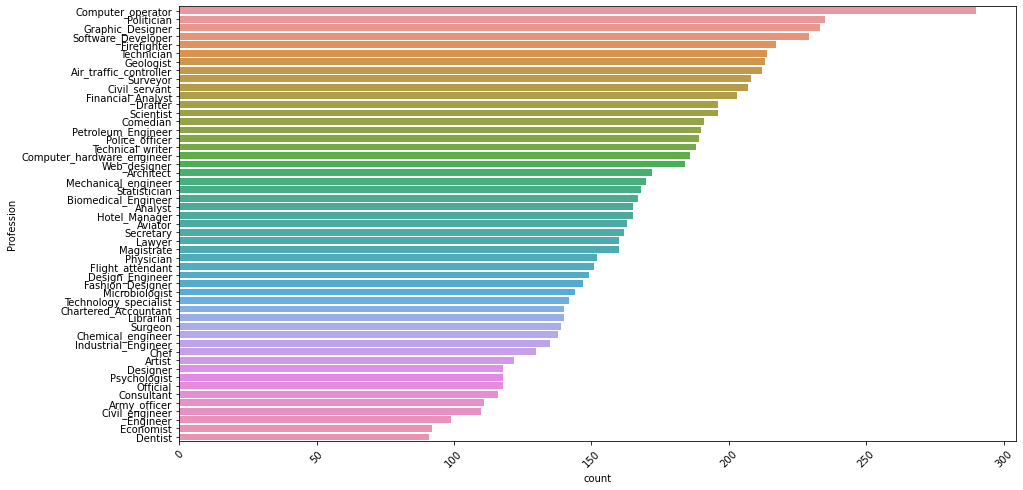

In [202]:
plt.figure(figsize=(15,8))
sns.countplot( y=l1['Profession'],order= l1['Profession'].value_counts().index)
plt.xticks(rotation=45)
plt.show()

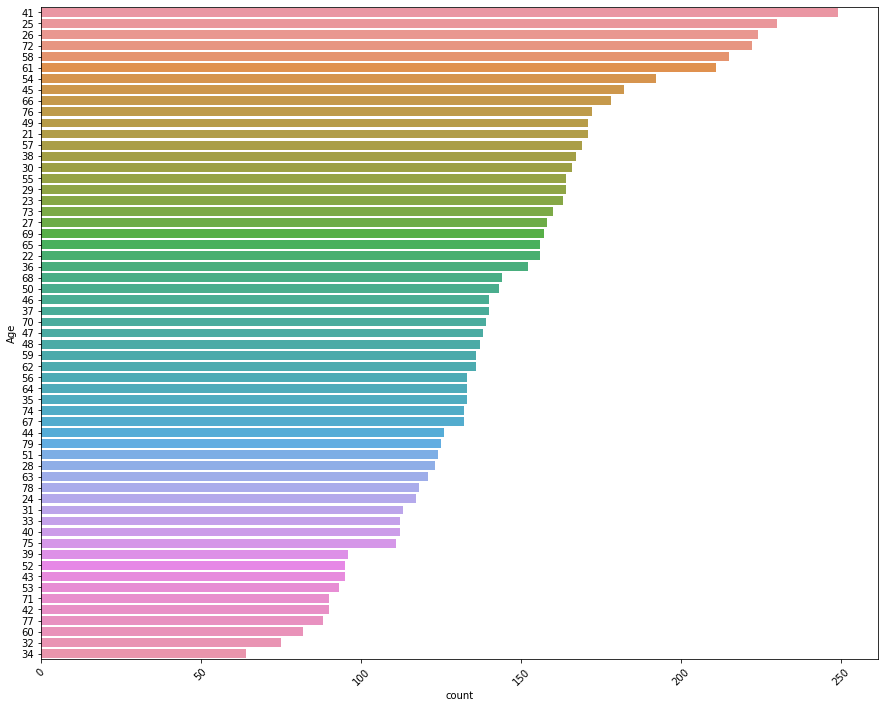

In [203]:
plt.figure(figsize=(15,12))
sns.countplot( y=l1['Age'],order= l1['Age'].value_counts().index)
plt.xticks(rotation=45)
plt.show()

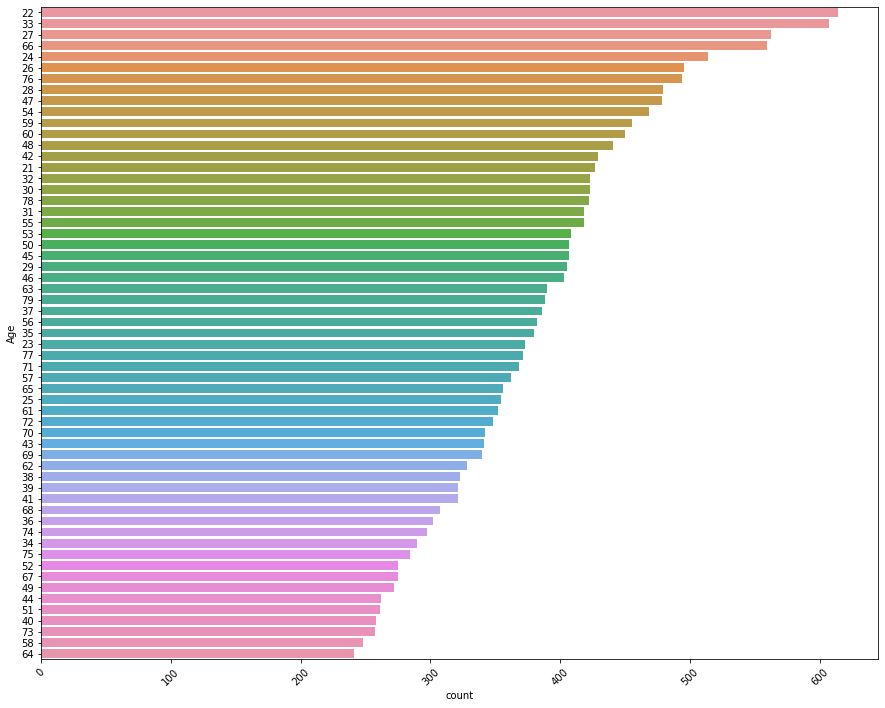

In [204]:
plt.figure(figsize=(15,12))
sns.countplot( y=l0['Age'],order= l0['Age'].value_counts().index)
plt.xticks(rotation=45)
plt.show()

In [ ]:
Taking the average of the ages then we can observe that people in the age group of 34-44 are more likely to default on loan
whereas people in the age group of 49-57 are least likely to default on loan.

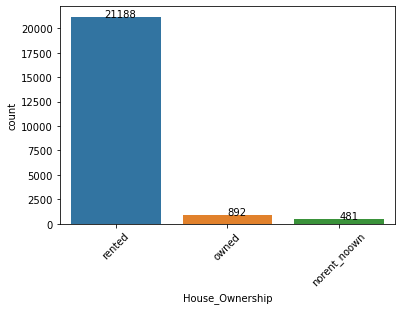

In [207]:
sns.countplot( x=l0['House_Ownership'],order= l0['House_Ownership'].value_counts().index)
plt.text(x=1,y=l0['House_Ownership'].value_counts()[1]+2,s=l0['House_Ownership'].value_counts()[1])
plt.text(x=-0.1,y=l0['House_Ownership'].value_counts()[0]+3,s=l0['House_Ownership'].value_counts()[0])
plt.text(x=2,y=l0['House_Ownership'].value_counts()[2]+6,s=l0['House_Ownership'].value_counts()[2])
plt.xticks(rotation=45)
plt.show()

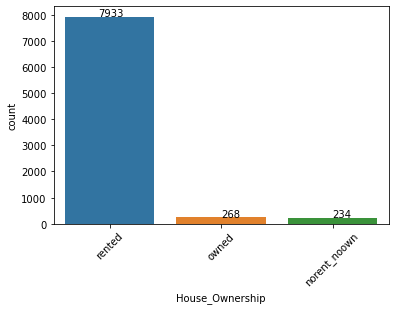

In [208]:
sns.countplot( x=l1['House_Ownership'],order= l1['House_Ownership'].value_counts().index)
plt.text(x=1,y=l1['House_Ownership'].value_counts()[1]+2,s=l1['House_Ownership'].value_counts()[1])
plt.text(x=-0.1,y=l1['House_Ownership'].value_counts()[0]+3,s=l1['House_Ownership'].value_counts()[0])
plt.text(x=2,y=l1['House_Ownership'].value_counts()[2]+6,s=l1['House_Ownership'].value_counts()[2])
plt.xticks(rotation=45)
plt.show()

<AxesSubplot:xlabel='CURRENT_JOB_YRS', ylabel='count'>

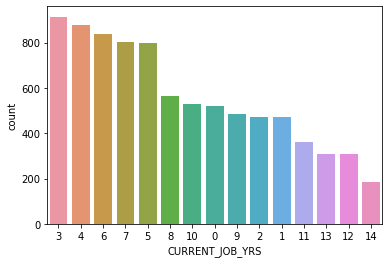

In [209]:
sns.countplot( x=l1['CURRENT_JOB_YRS'],order= l1['CURRENT_JOB_YRS'].value_counts().index)

<AxesSubplot:xlabel='CURRENT_JOB_YRS', ylabel='count'>

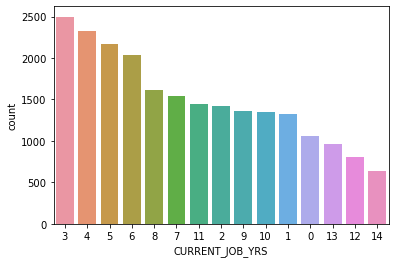

In [210]:
sns.countplot( x=l0['CURRENT_JOB_YRS'],order= l0['CURRENT_JOB_YRS'].value_counts().index)